## How To Plot Multiple Factors on a Boxplot in Python
#### Author: Rhondene Wint


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import scipy.stats as stas

In [57]:
##load the data
df = pd.read_table('nucleotide_comp.csv',sep=',')
df.head()

,Organization,A-content,G-content,C-content,T-content
0,Non-Nested,0.205479,0.356164,0.232877,0.205479
1,Nested,0.166667,0.319444,0.277778,0.236111
2,Nested,0.166667,0.319444,0.277778,0.236111
3,Non-Nested,0.194444,0.291667,0.250000,0.263889
4,Non-Nested,0.194444,0.291667,0.250000,0.263889


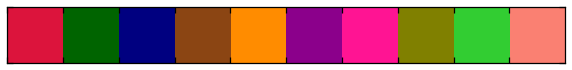

In [46]:
seaborn.set_context('notebook')
seaborn.set_palette('deep')
##set my custom color palette
colors = ['crimson','darkgreen','navy', 'saddlebrown','darkorange','darkmagenta', 'deeppink',
         'olive','limegreen','salmon']
seaborn.palplot(colors)  #my own
seaborn.set_palette(colors)

#### make a boxplot with seaborn

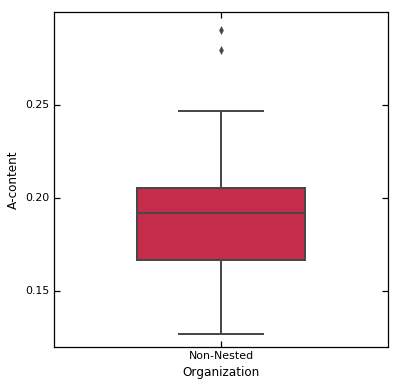

In [48]:
plt.figure(figsize=(6,6))

seaborn.boxplot(x='Organization',y='A-content',
                data=df[df['Organization']=='Non-Nested'],
                width=0.5, linewidth=2)

plt.show()

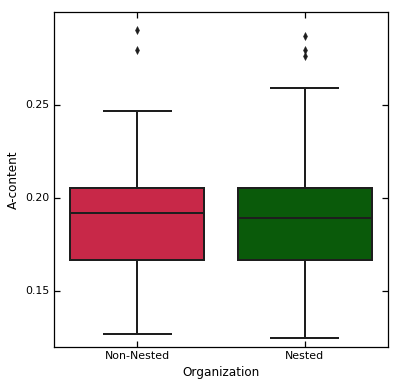

In [49]:
##plot A-content for all categories of genes
plt.figure(figsize=(6,6))

seaborn.boxplot(x='Organization',y='A-content', data=df,
               saturation=0.8, width=0.8, linewidth=2)

plt.show()

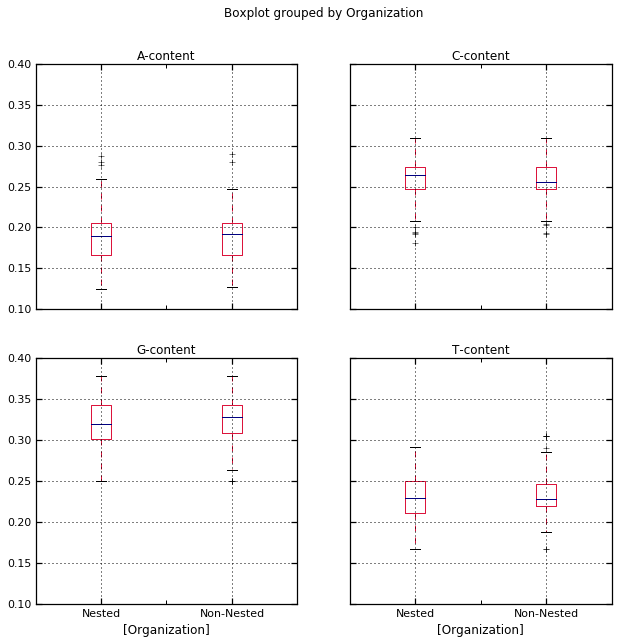

In [50]:
##plot all the nucleotide composition for all categories using
df.boxplot(by='Organization', figsize=(10,10))
plt.show()

This layout is not visually convenient for comparison. Ideally, we would like to see all the nucleotide composition for all categories of genes on the same axis. However, each nucleotide content is stored in separate columns, and unfortunately we cannot pass multiple columns to the seaborn or pandas boxplots functions. However, I found a work-around using pandas.melt function.

Pandas.melt() reshapes the data such that all the measurments for nucleotide composition are in the same column, and a separate column, "var_name", is created to keep track of which measurment corresponds to which nucleotide. 

In [51]:
##reshape the data so that is more analysis friendly
data=pd.melt(df,id_vars=['Organization'],
             value_vars=['A-content', 'G-content', 'C-content','T-content'],
             var_name='Nucleotide/Base')
data.head()

,Organization,Nucleotide/Base,value
0,Non-Nested,A-content,0.205479
1,Nested,A-content,0.166667
2,Nested,A-content,0.166667
3,Non-Nested,A-content,0.194444
4,Non-Nested,A-content,0.194444


Bingo! Now all the nucleotide measurements are in one column!

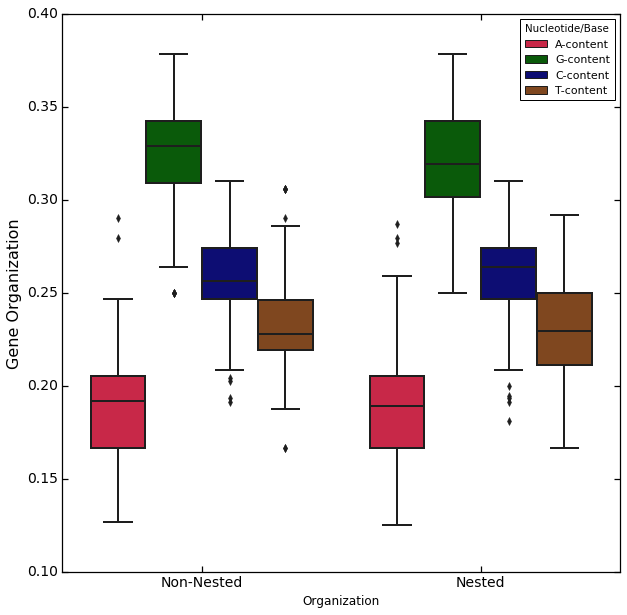

In [55]:
##plot all nucleotide compositions for all categories of genes
plt.figure(figsize=(10,10))

seaborn.boxplot(x='Organization',y='value', data=data, hue='Nucleotide/Base',
               saturation=0.8, width=0.8, linewidth=2)
##improve graph aesthetics
plt.xticks(fontsize=14);plt.yticks(fontsize=14)
plt.ylabel("Nucleotide Composition", fontsize=16)
plt.ylabel("Gene Organization", fontsize=16)

plt.show()

## Violinplots

Note that you can re-use the same code to make violinplots simply replacing "seaborn.boxplot" with "seaborn.violinplot". 

Violinplots are similar to boxplots, but are more informative because the shape of the violin changes with the density of the data.

https://blog.bioturing.com/2018/05/16/5-reasons-you-should-use-a-violin-graph/

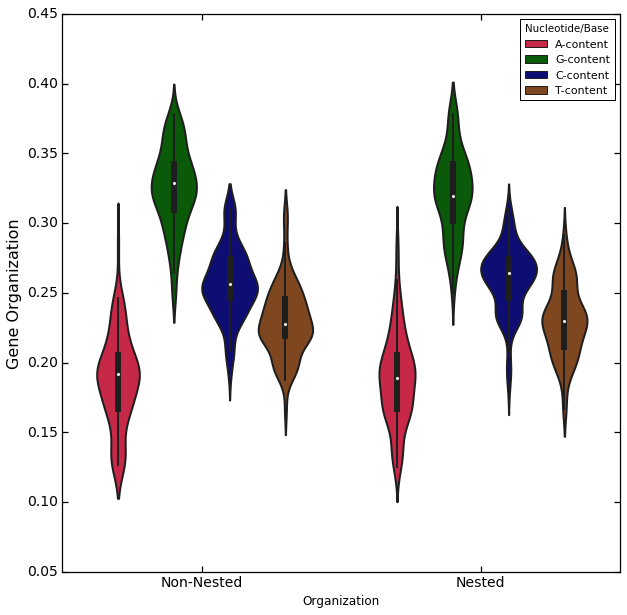

In [56]:
##plot all nucleotide compositions for all categories of genes
plt.figure(figsize=(10,10))

seaborn.violinplot(x='Organization',y='value', data=data, hue='Nucleotide/Base',
               saturation=0.8, width=0.8, linewidth=2)
##improve graph aesthetics
plt.xticks(fontsize=14);plt.yticks(fontsize=14)
plt.ylabel("Nucleotide Composition", fontsize=16)
plt.ylabel("Gene Organization", fontsize=16)

plt.show()

The thicker region of the violins represents data points with higher frequency, while the thicker regions represents low-frequency data points. For example, most Non-Nested genes have an C-content of 0.25.
